# M&M model VEM updates

In [1]:
dat = readRDS('/home/gaow/Documents/GTExV8/Thyroid.Lung.FMO2.filled.rds')
attach(dat)

In [2]:
%get X Y --from R
Y = Y.as_matrix()

Loading required package: feather


In [3]:
from libgaow.regression_data import MNMASH
import numpy as np

In [4]:
model = MNMASH(X=X,Y=Y)

In [5]:
model.set_prior({'identity': np.identity(2), 
                 'single_1': np.array([[1,0],[0,0]]), 
                 'single_2': np.array([[0,0], [0,1]]), 
                 'all_in': np.ones((2,2))}, 
                [0.5,1], 
                [0.9,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02])

In [ ]:
model.fit(niter=2)

In [7]:
model.post_mean_mat

array([[ -2.32382184e-19,  -1.36836333e-19],
       [ -3.04885813e-17,  -6.02915572e-17],
       [ -3.02330316e-18,  -3.35486223e-17],
       ..., 
       [  3.44738982e-19,   1.68615485e-18],
       [ -2.70497565e-19,  -1.08394346e-19],
       [  3.88702714e-19,   2.04068922e-18]])

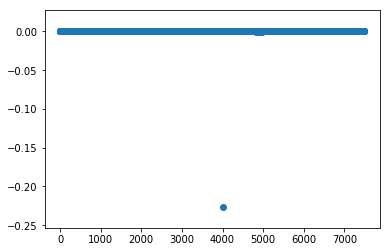

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter([x+1 for x in range(len(model.post_mean_mat[:,0]))], model.post_mean_mat[:,0], cmap="viridis")
ax = plt.gca()
plt.show()

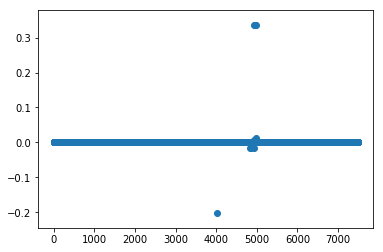

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter([x+1 for x in range(len(model.post_mean_mat[:,1]))], model.post_mean_mat[:,1], cmap="viridis")
ax = plt.gca()
plt.show()

## Debug previews

In [11]:
model.mash.B

array([[-0.02767384, -0.06585172],
       [-0.08742572,  0.00192239],
       [-0.03943936, -0.01741381],
       ..., 
       [ 0.01151077, -0.00210548],
       [-0.03341688,  0.07328577],
       [ 0.01482872,  0.0044251 ]])

In [34]:
model.mash.S

array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       ..., 
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])

In [8]:
print(model)

{   'Xr0': array([[ 0.09902838,  0.04492896],
       [ 0.09905334,  0.04493302],
       [-0.1277729 , -0.15765855],
       ..., 
       [-0.12777212, -0.15765836],
       [ 0.09902838,  0.04492896],
       [ 0.09902716,  0.04492899]]),
    'Y': array([[  1.60689480e-01,   7.73609574e-01],
       [  4.33098395e-01,   7.81487761e-01],
       [ -2.15164667e-01,  -6.50111523e-01],
       ..., 
       [  6.17574628e-01,   2.16840434e-18],
       [  3.03576608e-18,  -5.08905465e-02],
       [ -1.49299907e-01,   3.02853264e-01]]),
    'alpha0': array([[  5.45933365e-017,   1.32758321e-016,   1.89175534e-016, ...,
          6.77746859e-017,   5.29789647e-017,   7.05860121e-017],
       [  2.69163809e-015,   1.71270360e-014,   9.11265900e-015, ...,
          3.79612830e-015,   2.45367078e-015,   3.70535731e-015],
       [  2.22321669e-309,   1.55446248e-309,   8.98221633e-310, ...,
          8.14181125e-310,   1.30153690e-308,   8.28879486e-310],
       [  1.02446086e-171,   6.92914413e-172,   

In [7]:
model.mash.X @ (np.vstack(model.alpha0[4,:]) * model.mu0[4,:,:])

array([[ 0.00141929,  0.00349287],
       [-0.00089172,  0.00162742],
       [-0.00116825,  0.00088264],
       ..., 
       [-0.00049898,  0.00130733],
       [ 0.00147354,  0.0035191 ],
       [-0.00060989,  0.00060893]])

In [13]:
(model.alpha0[2,:] == model.alpha0[4,:]).all()

True

In [9]:
(model.mu0[4,:,:] == model.mu0[4,:,:]).all()

True

In [11]:
(np.vstack(model.alpha0[4,:]) * model.mu0[4,:,:])

array([[ -7.89963793e-09,  -5.20032243e-09],
       [ -9.65163534e-08,  -2.28080366e-07],
       [ -2.87999221e-08,  -6.00510760e-07],
       ..., 
       [  1.11552458e-08,   7.98473138e-08],
       [ -4.28912388e-09,  -2.21049054e-09],
       [  1.22126119e-08,   9.02205960e-08]])

In [7]:
lala = np.exp((model.mash.l10bf - np.max(model.mash.l10bf)) * np.log(10))

/home/gaow/Public/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


In [7]:
lik = model.mash.lik
np.min(lik['null_loglik'])

-348.70485097407152

In [9]:
np.max(model.alpha0)

0.99997864314616747

In [12]:
np.max(lik['alt_loglik'] - lik['null_loglik'])

345.62420250283145